In [1]:
import sys
sys.path.append('../../lib')

from common import *
from graph import *

In [2]:
class Node:
    
    BLACK = 0
    RED = 1
    
    def __init__(self, k, color = BLACK):
        self.key = k
        self.left = self.right = self.p = None
        self.color = color
    
    def copySatelliteData(self, o):
        pass
    
    def __str__(self):
        return str(self.key)
    

In [3]:
class RedBlackTree:
    
    def __init__(self):
        nil = Node('NIL')
        nil.left = nil.right = nil.p = nil
        
        self.root = self.nil = nil

    def search(self, k):
        x = self.root
        
        while x != self.nil and x.key != k:
            if k < x.key:
                x = x.left
            else:
                x = x.right
        
        return x

    def minimum(self, x = None):
        if x is None:
            x = self.root
        
        while x != self.nil and x.left != self.nil:
            x = x.left
        
        return x

    def maximum(self, x = None):
        if x is None:
            x = self.root
        
        while x != self.nil and x.right != self.nil:
            x = x.right
        
        return x

    def successor(self, x):
        if x.right != self.nil:
            return self.minimum(x.right)
        
        y = x.p
        while y != self.nil and x == y.right:
            x = y
            y = y.p
    
        return y
    
    def predecessor(self, x):
        if x.left != None:
            return self.maximum(x.left)
        
        y = x.p
        while y != self.nil and x == y.left:
            x = y
            y = y.p
    
        return y
            
    def leftRotate(self, x):
        # assume: x != nil, x.right != nil
        
        y = x.right
        x.right = y.left
        
        if y.left != self.nil:
            y.left.p = x
        
        y.p = x.p
        if x.p == self.nil:
            self.root = y
        elif x == x.p.left:
            x.p.left = y
        else:
            x.p.right = y
        
        y.left = x
        x.p = y
    
    def rightRotate(self, y):
        # assume: y != nil, y.left != nil
        
        x = y.left
        y.left = x.right
        
        if x.right != self.nil:
            x.right.p = y
        
        x.p = y.p
        if y.p == self.nil:
            self.root = x
        elif y == y.p.left:
            y.p.left = x
        else:
            y.p.right = x
        
        x.right = y
        y.p = x
        
    def insert(self, z):
        y = self.nil
        x = self.root
        
        while x != self.nil:
            y = x
            if z.key < x.key:
                x = x.left
            else:
                x = x.right
        
        z.p = y
        if y == self.nil:
            self.root = z
        elif z.key < y.key:
            y.left = z
        else:
            y.right = z
        
        z.left = z.right = self.nil
        z.color = Node.RED
        
        self.insertFixup(z)
    
    def insertFixup(self, z):
        while z.p.color == Node.RED:
            if z.p == z.p.p.left:
                y = z.p.p.right
                if y.color == Node.RED:
                    z.p.color = Node.BLACK
                    y.color = Node.BLACK
                    z.p.p.color = Node.RED
                    z = z.p.p
                elif z == z.p.right:
                    z = z.p
                    self.leftRotate(z)
                else:
                    z.p.color = Node.BLACK
                    z.p.p.color = Node.RED
                    self.rightRotate(z.p.p)
            else:
                y = z.p.p.left
                if y.color == Node.RED:
                    z.p.color = Node.BLACK
                    y.color = Node.BLACK
                    z.p.p.color = Node.RED
                    z = z.p.p
                elif z == z.p.left:
                    z = z.p
                    self.rightRotate(z)
                else:
                    z.p.color = Node.BLACK
                    z.p.p.color = Node.RED
                    self.leftRotate(z.p.p)
                        
        self.root.color = Node.BLACK
    
    def delete(self, z):
        if z.left == self.nil or z.right == self.nil:
            y = z
        else:
            y = self.successor(z)
        
        if y.left != self.nil:
            x = y.left
        else:
            x = y.right
        
        x.p = y.p
        
        if y.p == self.nil:
            self.root = x
        elif y == y.p.left:
            y.p.left = x
        else:
            y.p.right = x
            
        if y != z:
            z.key = y.key
            z.copySatelliteData(y)
        
        if y.color == Node.BLACK:
            self.deleteFixup(x)
        
        return y

    def deleteFixup(self, x):
        while x != self.root and x.color == Node.BLACK:
            if x == x.p.left:
                w = x.p.right
                if w.color == Node.RED:
                    w.color = Node.BLACK
                    x.p.color = Node.RED
                    self.leftRotate(x.p)
                    w = x.p.right
                elif w.left.color == Node.BLACK and w.right.color == Node.BLACK:
                    w.color = Node.RED
                    x = x.p
                elif w.right.color == Node.BLACK:
                    w.left.color = Node.BLACK
                    w.color = Node.RED
                    self.rightRotate(w)
                    w = x.p.right
                else:
                    w.color = x.p.color
                    x.p.color = Node.BLACK
                    w.right.color = Node.BLACK
                    self.leftRotate(x.p)
                    x = self.root
            else:
                w = x.p.left
                if w.color == Node.RED:
                    w.color = Node.BLACK
                    x.p.color = Node.RED
                    self.rightRotate(x.p)
                    w = x.p.left
                elif w.right.color == Node.BLACK and w.left.color == Node.BLACK:
                    w.color = Node.RED
                    x = x.p
                elif w.left.color == Node.BLACK:
                    w.right.color = Node.BLACK
                    w.color = Node.RED
                    self.leftRotate(w)
                    w = x.p.left
                else:
                    w.color = x.p.color
                    x.p.color = Node.BLACK
                    w.left.color = Node.BLACK
                    self.rightRotate(x.p)
                    x = self.root
                                
        x.color = Node.BLACK   
        
        if self.nil.color == Node.BLACK:
            color = 'black'
        else:
            color = 'red'
            
        print('NIL [ color = %s, p = %s]' % (color, str(self.nil.p)))
                    
                    
        

original:


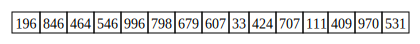

In [4]:
n = 15
data = gen_data(n)


draw_array('original:', data)


sorted:


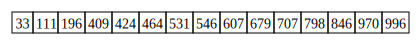

In [5]:
sorted_data = sort(data)
draw_array('sorted:', sorted_data)


rbtree:


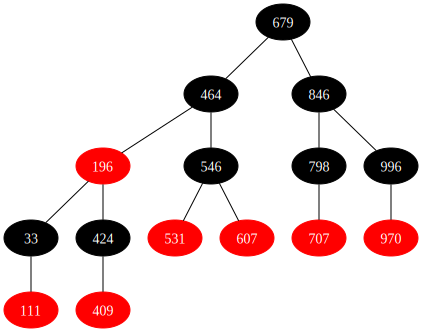

In [6]:
t = RedBlackTree()

for x in data:    
    t.insert(Node(x))
    

draw_rbtree('rbtree:', t)

In [7]:
x = t.search(data[n // 2])
str(x)


'607'

In [8]:
predecessor = t.predecessor(x)
str(predecessor)


'NIL'

In [9]:
successor = t.successor(x)
str(successor)


'679'

delete(607): 607


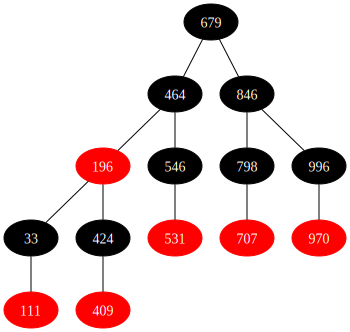

--------------------------------------------------------------------------------
delete(409): 409


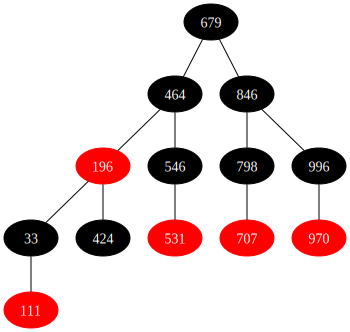

--------------------------------------------------------------------------------
NIL [ color = black, p = 424]
delete(546): 546


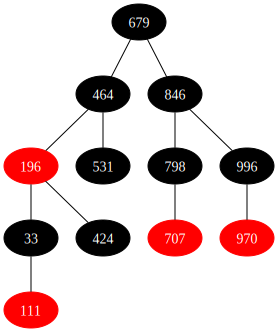

--------------------------------------------------------------------------------
delete(846): 970


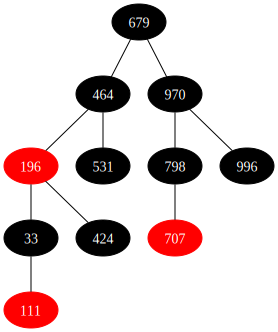

--------------------------------------------------------------------------------
NIL [ color = black, p = 970]
delete(996): 996


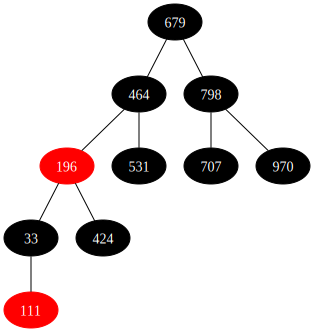

--------------------------------------------------------------------------------
NIL [ color = black, p = 970]
delete(33): 33


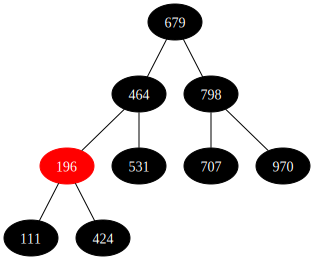

--------------------------------------------------------------------------------
NIL [ color = black, p = 196]
delete(424): 424


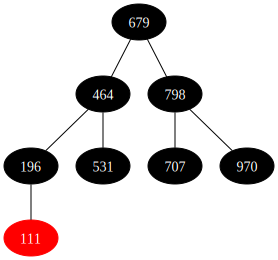

--------------------------------------------------------------------------------
delete(111): 111


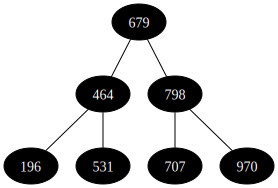

--------------------------------------------------------------------------------
NIL [ color = black, p = 464]
delete(531): 531


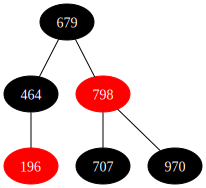

--------------------------------------------------------------------------------
NIL [ color = black, p = 798]
delete(707): 707


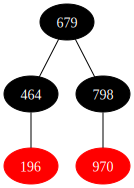

--------------------------------------------------------------------------------
NIL [ color = black, p = 798]
delete(798): 798


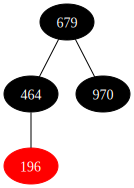

--------------------------------------------------------------------------------
NIL [ color = black, p = 798]
delete(464): 464


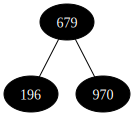

--------------------------------------------------------------------------------
NIL [ color = black, p = 970]
delete(679): 970


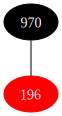

--------------------------------------------------------------------------------
NIL [ color = black, p = 970]
delete(970): 970


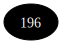

--------------------------------------------------------------------------------
NIL [ color = black, p = NIL]
delete(196): 196


--------------------------------------------------------------------------------


In [10]:
shuffled_data = shuffle(data)
for k in shuffled_data:
    x = t.search(k)    
    t.delete(x)
    
    draw_rbtree('delete({}): {}'.format(k, x), t)
    br()